<a href="https://colab.research.google.com/github/BhavithavSetty/Liver-Disease-Diagnosis/blob/main/preprocessing_repeated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Use raw string or double backslashes for the file path
file_path = r'C:\Users\setty\Desktop\liver disease diagnosis\rebalanced_dataset (1).csv'

# Load the file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   Age of the patient  Gender of the patient  Total Bilirubin  \
0                  65                      0              0.7   
1                  62                      1             10.9   
2                  62                      1              7.3   
3                  58                      1              1.0   
4                  72                      1              3.9   

   Direct Bilirubin  Alkphos Alkaline Phosphotase  \
0               0.1                           187   
1               5.5                           699   
2               4.1                           490   
3               0.4                           182   
4               2.0                           195   

   Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                             16                               18   
1                             64                              100   
2                             60                               68   
3             

In [3]:
df.isna().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd



# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Gender' column
df['Gender of the patient'] = label_encoder.fit_transform(df['Gender of the patient'])

# Display the updated DataFrame
print(df)

       Age of the patient  Gender of the patient  Total Bilirubin  \
0                      65                      0         0.700000   
1                      62                      1        10.900000   
2                      62                      1         7.300000   
3                      58                      1         1.000000   
4                      72                      1         3.900000   
...                   ...                    ...              ...   
27707                  58                      1         1.442701   
27708                  58                      1         1.438834   
27709                  60                      1         1.584708   
27710                  63                      1         2.037631   
27711                  61                      1         1.564204   

       Direct Bilirubin  Alkphos Alkaline Phosphotase  \
0              0.100000                           187   
1              5.500000                           699   


In [5]:
df['Gender of the patient'] = df['Gender of the patient'].astype(float)

In [6]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40,0


Correlation Matrix:
                                      Age of the patient  \
Age of the patient                              1.000000   
Gender of the patient                           0.010373   
Total Bilirubin                                -0.004585   
Direct Bilirubin                               -0.003576   
Alkphos Alkaline Phosphotase                   -0.005365   
Sgpt Alamine Aminotransferase                   0.000136   
Sgot Aspartate Aminotransferase                 0.003875   
Total Protiens                                 -0.018724   
ALB Albumin                                    -0.008120   
A/G Ratio Albumin and Globulin Ratio            0.008093   
Result                                         -0.004355   

                                      Gender of the patient  Total Bilirubin  \
Age of the patient                                 0.010373        -0.004585   
Gender of the patient                              1.000000         0.038866   
Total Bilirubin    

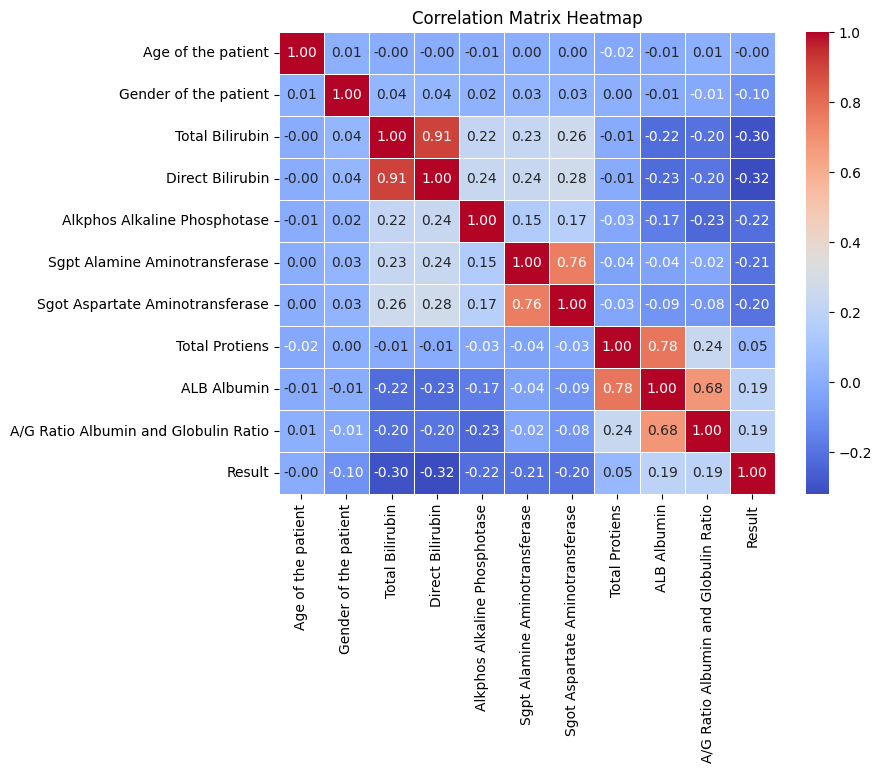

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

# Median Imputation
imputer = SimpleImputer(strategy='median')
df['Age of the patient'] = imputer.fit_transform(df[['Age of the patient']])

In [ ]:
df.isna().sum()

,0
Age of the patient,0
Gender of the patient,0
Total Bilirubin,557
Direct Bilirubin,490
Alkphos Alkaline Phosphotase,694
Sgpt Alamine Aminotransferase,459
Sgot Aspartate Aminotransferase,393
Total Protiens,370
ALB Albumin,413
A/G Ratio Albumin and Globulin Ratio,436


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# MICE Imputation
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
columns_to_impute = [
    'Direct Bilirubin','Total Bilirubin'
]
df[columns_to_impute] = mice_imputer.fit_transform(df[columns_to_impute])


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# MICE Imputation
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
columns_to_impute = [
    'Sgot Aspartate Aminotransferase', 'Total Protiens','A/G Ratio Albumin and Globulin Ratio'
]
df[columns_to_impute] = mice_imputer.fit_transform(df[columns_to_impute])


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# MICE Imputation
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
columns_to_impute = [
    'Alkphos Alkaline Phosphotase','Sgpt Alamine Aminotransferase','ALB Albumin'

]
df[columns_to_impute] = mice_imputer.fit_transform(df[columns_to_impute])


In [ ]:
df.isna().sum()

,0
Age of the patient,0
Gender of the patient,0
Total Bilirubin,0
Direct Bilirubin,0
Alkphos Alkaline Phosphotase,0
Sgpt Alamine Aminotransferase,0
Sgot Aspartate Aminotransferase,0
Total Protiens,0
ALB Albumin,0
A/G Ratio Albumin and Globulin Ratio,0


In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('processed_liver_dataset.csv', index=False)

In [ ]:
file_path = '/content/processed_liver_dataset.csv'

# Load the file into a pandas DataFrame
df = pd.read_csv(file_path)

In [ ]:
df['Result'] = df['Result'].replace({1: 0, 2: 1})

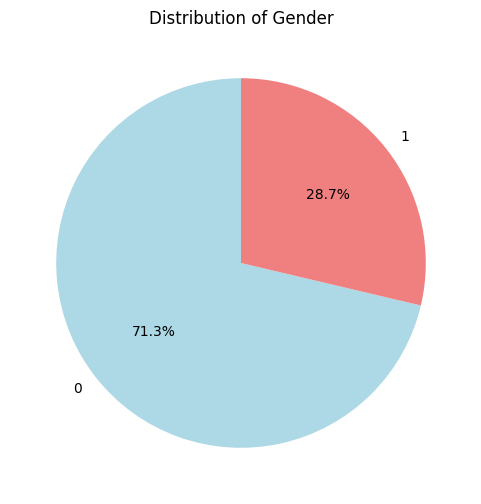

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

value_counts=df['Result'].value_counts()
plt.figure(figsize=(6, 6))  # Set the size of the plot
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Add title and labels
plt.title('Distribution of Gender')
plt.ylabel('')  # Remove the y-label

# Display the plot
plt.show()

In [ ]:
# Step 1: Install imbalanced-learn (if not already installed)
# pip install imbalanced-learn

# Step 2: Load your dataset
import pandas as pd
from collections import Counter

# Example: Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features (X) and target (y)
X = df.drop('Result', axis=1)  # Replace 'target' with your target column name
y = df['Result']  # Replace 'target' with your target column name

# Check the class distribution before ADASYN
print("Class distribution before ADASYN:", Counter(y))

# Step 3: Apply ADASYN
from imblearn.over_sampling import ADASYN

# Initialize ADASYN
adasyn = ADASYN(random_state=42)

# Apply ADASYN to the dataset
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Check the class distribution after ADASYN
print("Class distribution after ADASYN:", Counter(y_resampled))

# Step 4: Save the balanced dataset
# Combine the resampled features and target into a DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Result'] = y_resampled  # Replace 'target' with your target column name

# Save the balanced dataset to a CSV file
balanced_df.to_csv('balanced_dataset.csv', index=False)
print("Balanced dataset saved to 'balanced_dataset.csv'")

Class distribution before ADASYN: Counter({0: 13811, 1: 5557})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The ADASYN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after ADASYN: Counter({0: 13811, 1: 13666})
Balanced dataset saved to 'balanced_dataset.csv'


In [ ]:
df = pd.read_csv("/content/balanced_dataset.csv")

In [ ]:
df['Result'].value_counts()

,count
Result,
0,13811
1,13666


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("balanced_dataset.csv")  # Change to your actual file

# Replace values in the 'result' column
df['Result'] = df['Result'].replace({1: 0, 2: 1})

# Save the modified dataset if needed
df.to_csv("balanced1_dataset.csv", index=False)

# Display the first few rows to verify
print(df.head(15))
df['Result'].value_counts()


    Age of the patient  Gender of the patient  Total Bilirubin  \
0                 65.0                    0.0              0.7   
1                 62.0                    1.0             10.9   
2                 62.0                    1.0              7.3   
3                 58.0                    1.0              1.0   
4                 72.0                    1.0              3.9   
5                 46.0                    1.0              1.8   
6                 26.0                    0.0              0.9   
7                 29.0                    0.0              0.9   
8                 17.0                    1.0              0.9   
9                 55.0                    1.0              0.7   
10                57.0                    1.0              0.6   
11                72.0                    1.0              2.7   
12                64.0                    1.0              0.9   
13                74.0                    0.0              1.1   
14        

,count
Result,
0,27477


In [ ]:
file_path = '/content/balanced_dataset.csv'

# Load the file into a pandas DataFrame
df = pd.read_csv(file_path)

In [ ]:
import pandas as pd

# Convert specific columns to int
int_cols = ['Age of the patient','Gender of the patient','Alkphos Alkaline Phosphotase'	,'Sgpt Alamine Aminotransferase'	,'Sgot Aspartate Aminotransferase']
df[int_cols] = df[int_cols].astype(int)

# Convert specific columns to float with 2 decimals
float_cols = ['Total Protiens'	,'ALB Albumin',	'A/G Ratio Albumin and Globulin Ratio','Total Bilirubin','Direct Bilirubin'

]
df[float_cols] = df[float_cols].astype(float).round(2)

# Display output

df.to_csv("balanced_dataset.csv", index=False)



In [ ]:
import pandas as pd

# Load your dataset with an encoding option
df = pd.read_csv('balanced_dataset.csv')

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Optionally, you can reset the index after dropping duplicates
df_cleaned.reset_index(drop=True, inplace=True)

# Save the cleaned dataset
df_cleaned.to_csv('cleaned1_dataset.csv', index=False)

# Display the cleaned dataframe
print(df_cleaned)


       Age of the patient  Gender of the patient  Total Bilirubin  \
0                      65                      0              0.7   
1                      62                      1             10.9   
2                      62                      1              7.3   
3                      58                      1              1.0   
4                      72                      1              3.9   
...                   ...                    ...              ...   
25202                  54                      1              0.8   
25203                  64                      1              0.8   
25204                  58                      0              0.8   
25205                  17                      0              0.8   
25206                  17                      0              0.8   

       Direct Bilirubin  Alkphos Alkaline Phosphotase  \
0                   0.1                           187   
1                   5.5                           699   


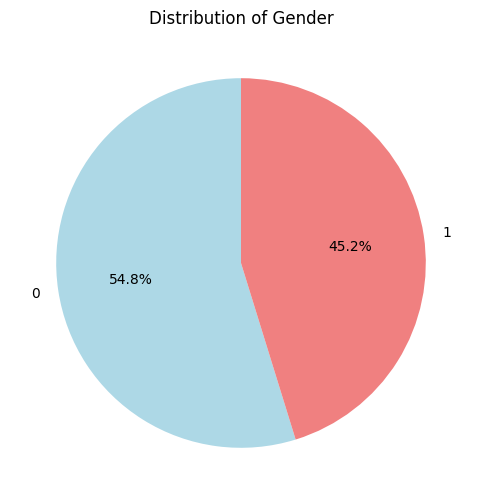

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/cleaned1_dataset.csv')
value_counts=df['Result'].value_counts()
plt.figure(figsize=(6, 6))  # Set the size of the plot
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Add title and labels
plt.title('Distribution of Gender')
plt.ylabel('')  # Remove the y-label

# Display the plot
plt.show()

In [ ]:
# Step 1: Install imbalanced-learn (if not already installed)
# pip install imbalanced-learn

# Step 2: Load your dataset
import pandas as pd
from collections import Counter

# Example: Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features (X) and target (y)
X = df.drop('Result', axis=1)  # Replace 'target' with your target column name
y = df['Result']  # Replace 'target' with your target column name

# Check the class distribution before ADASYN
print("Class distribution before ADASYN:", Counter(y))

# Step 3: Apply ADASYN
from imblearn.over_sampling import ADASYN

# Initialize ADASYN
adasyn = ADASYN(random_state=42)

# Apply ADASYN to the dataset
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Check the class distribution after ADASYN
print("Class distribution after ADASYN:", Counter(y_resampled))

# Step 4: Save the balanced dataset
# Combine the resampled features and target into a DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Result'] = y_resampled  # Replace 'target' with your target column name

# Save the balanced dataset to a CSV file
balanced_df.to_csv('rebalanced_dataset.csv', index=False)
print("Balanced dataset saved to 'rebalanced_dataset.csv'")

Class distribution before ADASYN: Counter({0: 13808, 1: 11399})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The ADASYN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after ADASYN: Counter({1: 13904, 0: 13808})
Balanced dataset saved to 'rebalanced_dataset.csv'


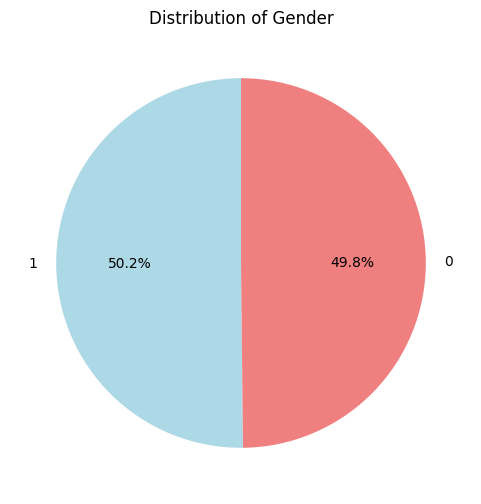

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/rebalanced_dataset.csv')
value_counts=df['Result'].value_counts()
plt.figure(figsize=(6, 6))  # Set the size of the plot
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Add title and labels
plt.title('Distribution of Gender')
plt.ylabel('')  # Remove the y-label

# Display the plot
plt.show()